In [26]:
install.packages("pROC")
install.packages("vctrs")
install.packages("caret")
install.packages("nnet")
install.packages("ggplot2")
install.packages("cowplot")
install.packages("ggplot2")


The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpOjYNme/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpOjYNme/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpOjYNme/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpOjYNme/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpOjYNme/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpOjYNme/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpOjYNme/downloaded_packages


In [42]:
subjective <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/regression_tables/fieldwork/subjective_table.csv")

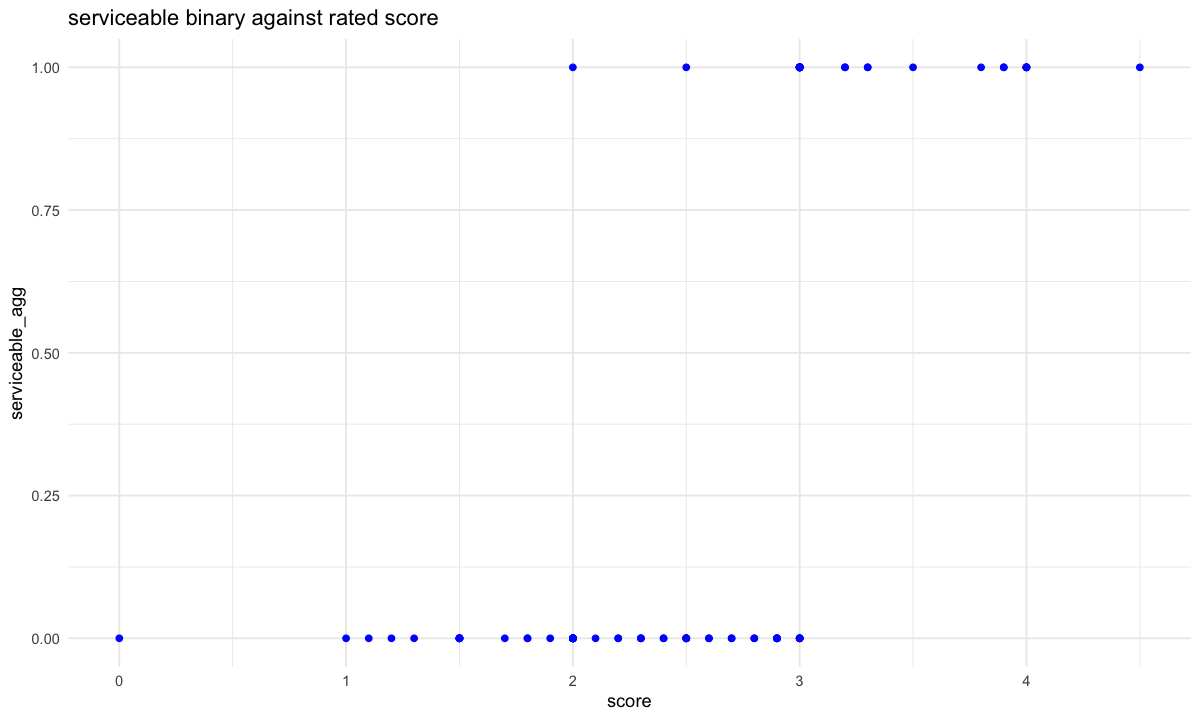

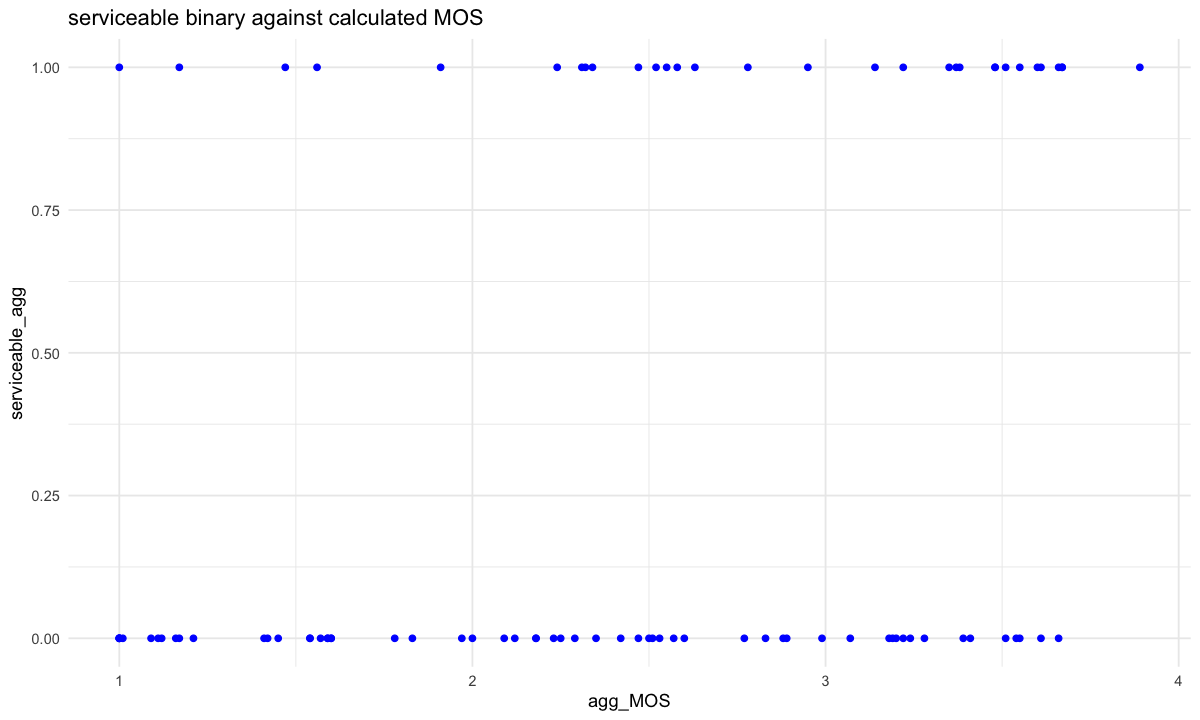

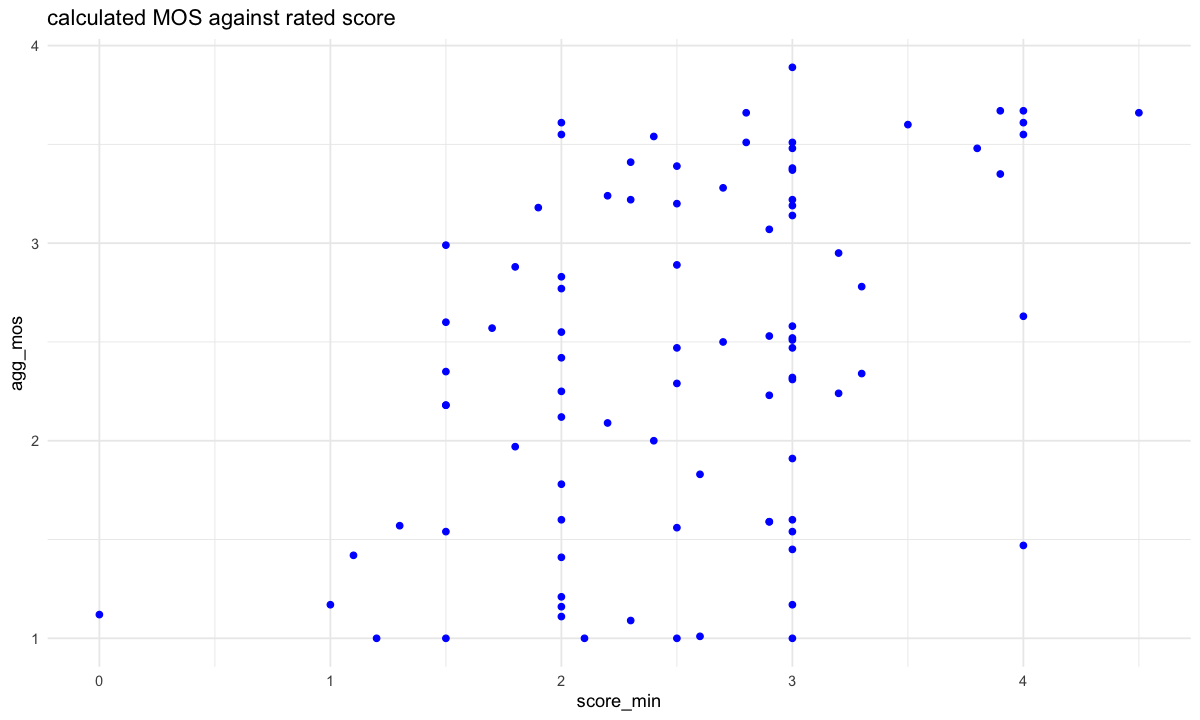

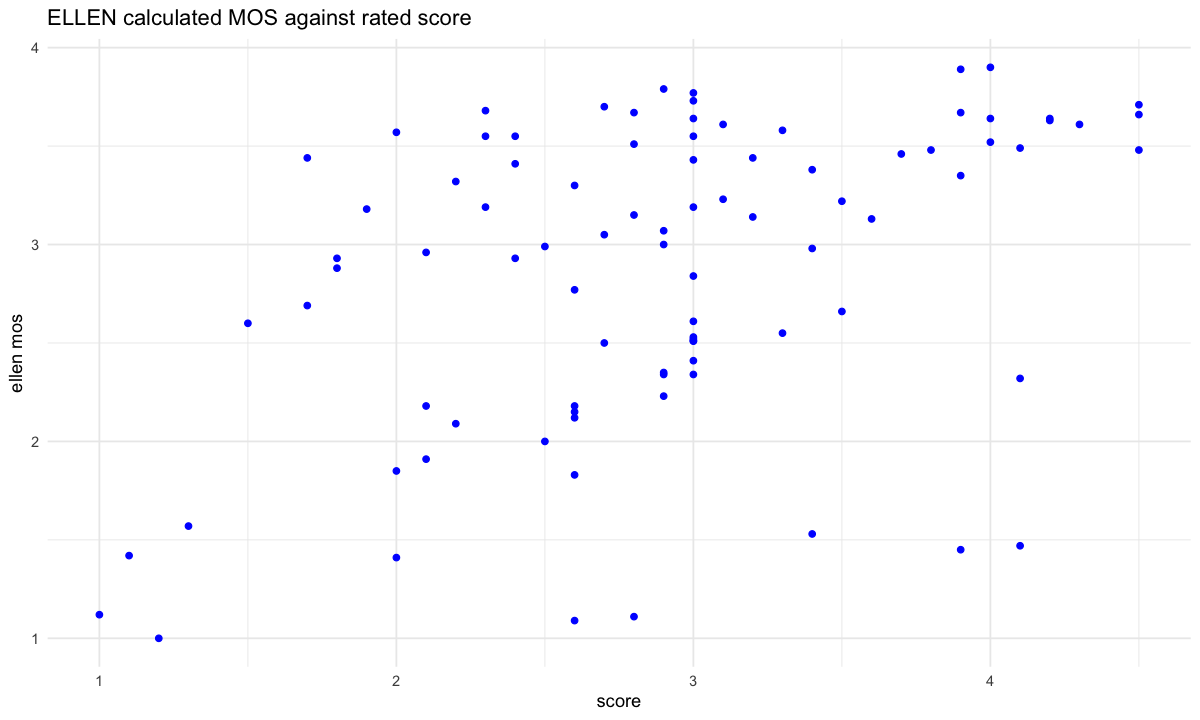

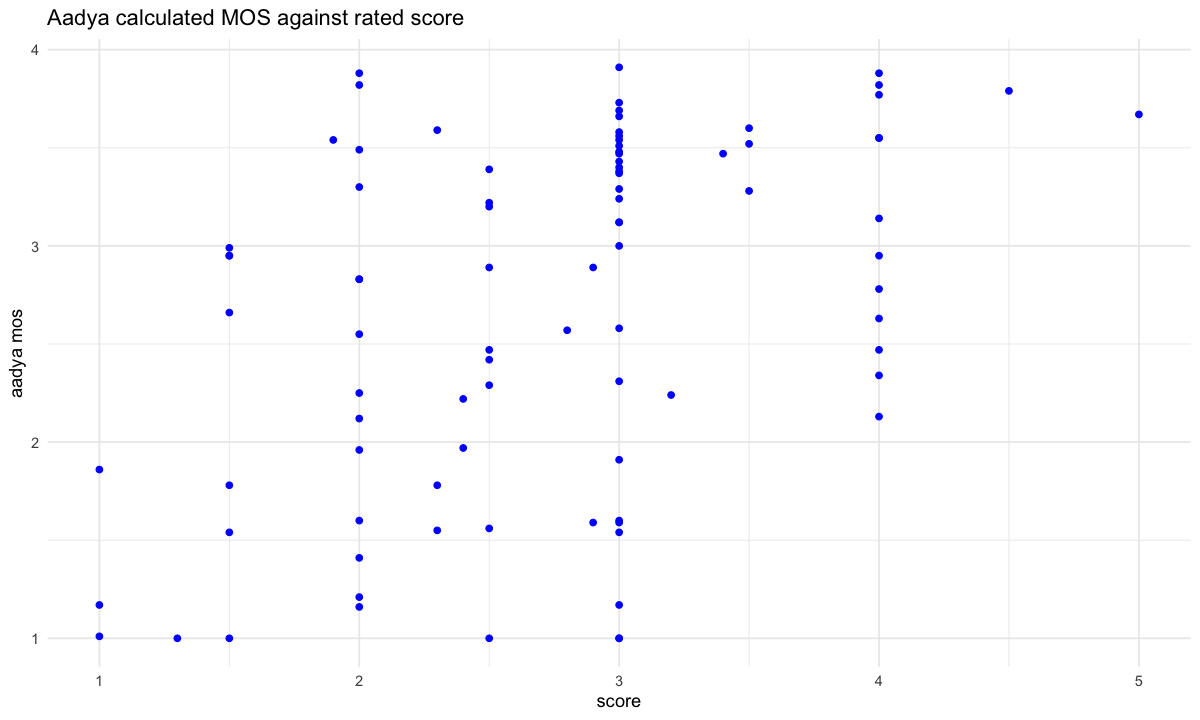

In [43]:

library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 6)

ggplot(subjective, aes(x = score_min, y = serviceable_agg)) +
  geom_point(color = "blue") +
  labs(title = "serviceable binary against rated score", x = "score", y = "serviceable_agg") +
  theme_minimal()

ggplot(subjective, aes(x = agg_mos, y = serviceable_agg)) +
  geom_point(color = "blue") +
  labs(title = "serviceable binary against calculated MOS", x = "agg_MOS", y = "serviceable_agg") +
  theme_minimal()

ggplot(subjective, aes(x = score_min, y = agg_mos)) +
  geom_point(color = "blue") +
  labs(title = "calculated MOS against rated score", x = "score_min", y = "agg_mos") +
  theme_minimal()

ggplot(subjective, aes(x = score_ellen, y = e_mos)) +
  geom_point(color = "blue") +
  labs(title = "ELLEN calculated MOS against rated score", x = "score", y = "ellen mos") +
  theme_minimal()

ggplot(subjective, aes(x = score_aadya, y = a_mos)) +
  geom_point(color = "blue") +
  labs(title = "Aadya calculated MOS against rated score", x = "score", y = "aadya mos") +
  theme_minimal()

Setting levels: control = 0, case = 1



Setting direction: controls < cases



Area under the curve: 0.7023


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 51 18
         1  8 13
                                         
               Accuracy : 0.7111         
                 95% CI : (0.606, 0.8018)
    No Information Rate : 0.6556         
    P-Value [Acc > NIR] : 0.15906        
                                         
                  Kappa : 0.3073         
                                         
 Mcnemar's Test P-Value : 0.07756        
                                         
            Sensitivity : 0.8644         
            Specificity : 0.4194         
         Pos Pred Value : 0.7391         
         Neg Pred Value : 0.6190         
             Prevalence : 0.6556         
         Detection Rate : 0.5667         
   Detection Prevalence : 0.7667         
      Balanced Accuracy : 0.6419         
                                         
       'Positive' Class : 0              
                                         

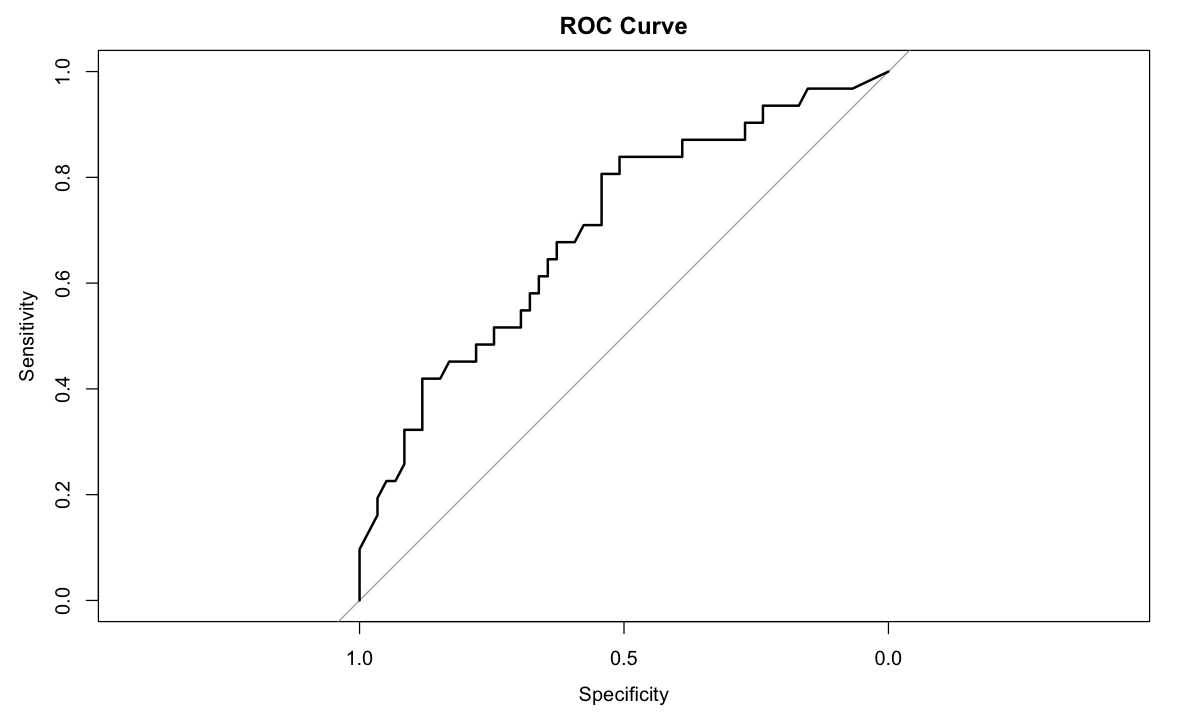

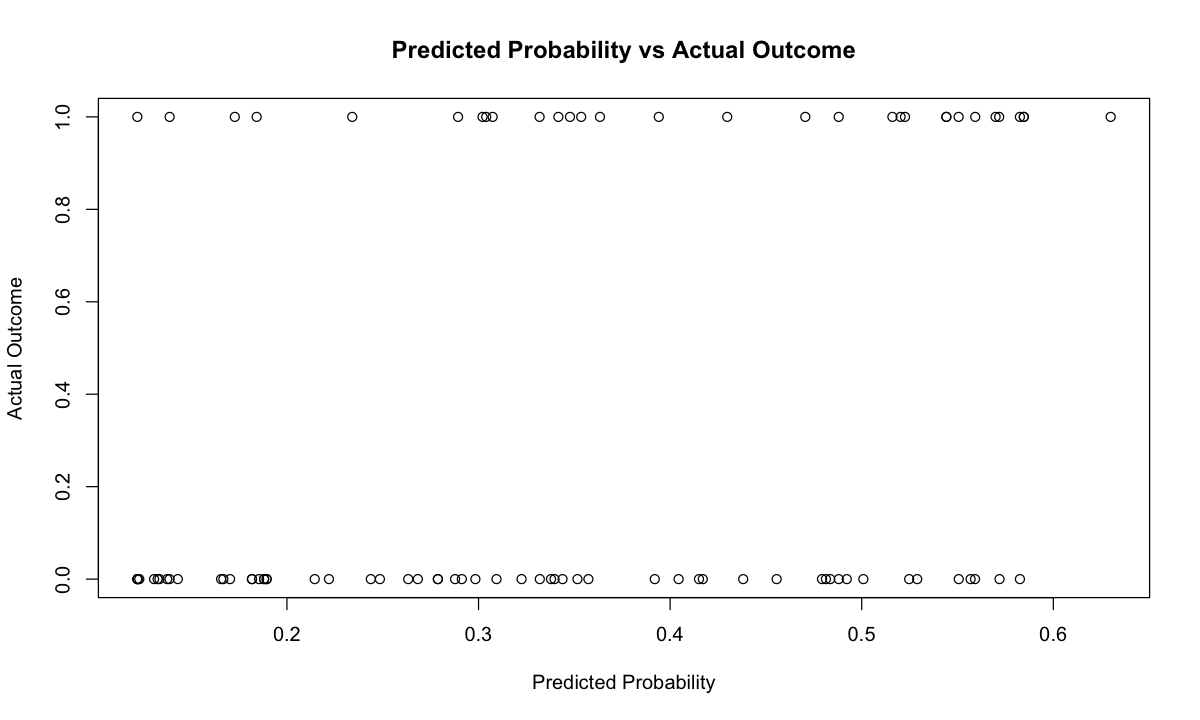

In [44]:
# Load necessary libraries
library(caret)
library(pROC)

# Fit the logistic regression model
fit_logistic <- glm(serviceable_agg ~ agg_mos, data = subjective, family = binomial)

# Get predictions
predictions <- predict(fit_logistic, subjective, type = "response")

# Plot the ROC curve
par(bg = "white")
roc_curve <- roc(subjective$serviceable_agg, predictions)
plot(roc_curve, main = "ROC Curve")
auc_value <- auc(roc_curve)
print(auc_value)

# Print confusion matrix
predicted_class <- ifelse(predictions > 0.5, 1, 0)
confusionMatrix(as.factor(predicted_class), as.factor(subjective$serviceable_agg))

# Plot with jitter to visualize overlapping points
par(bg = "white")
plot(jitter(predictions), subjective$serviceable_agg, 
     xlab = "Predicted Probability", ylab = "Actual Outcome", 
     main = "Predicted Probability vs Actual Outcome")

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.7519


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 40 12
         1 13 25
                                          
               Accuracy : 0.7222          
                 95% CI : (0.6178, 0.8115)
    No Information Rate : 0.5889          
    P-Value [Acc > NIR] : 0.006028        
                                          
                  Kappa : 0.4286          
                                          
 Mcnemar's Test P-Value : 1.000000        
                                          
            Sensitivity : 0.7547          
            Specificity : 0.6757          
         Pos Pred Value : 0.7692          
         Neg Pred Value : 0.6579          
             Prevalence : 0.5889          
         Detection Rate : 0.4444          
   Detection Prevalence : 0.5778          
      Balanced Accuracy : 0.7152          
                                          
       'Positive' Class : 0               
                                    

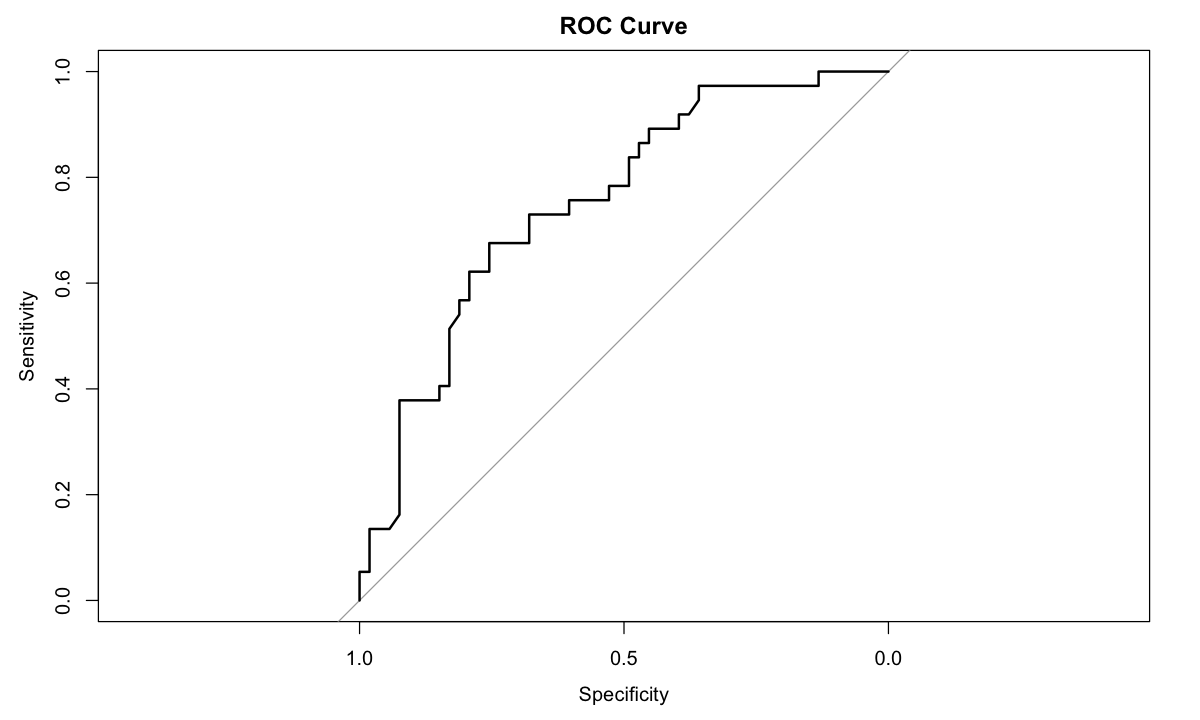

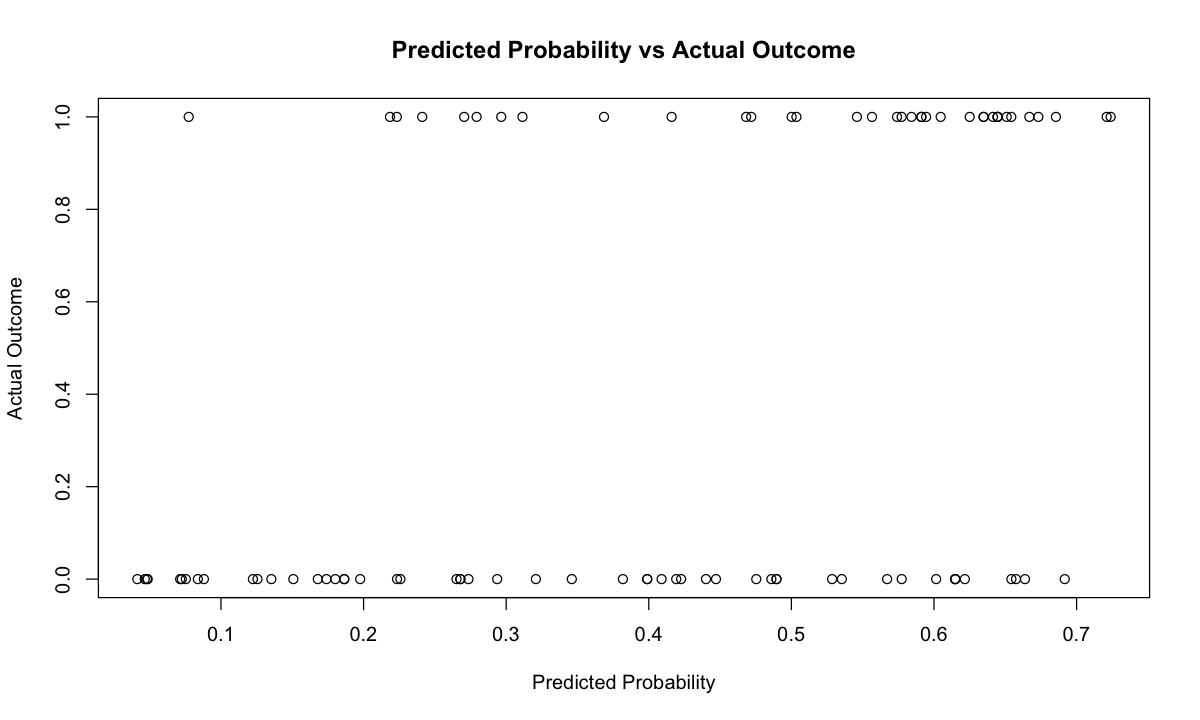

In [45]:
# Fit the logistic regression model
fit_logistic <- glm(serviceable_ellen ~ e_mos, data = subjective, family = binomial)

# Get predictions
predictions <- predict(fit_logistic, subjective, type = "response")

# Plot the ROC curve
par(bg = "white")
roc_curve <- roc(subjective$serviceable_ellen, predictions)
plot(roc_curve, main = "ROC Curve")
auc_value <- auc(roc_curve)
print(auc_value)

# Print confusion matrix
predicted_class <- ifelse(predictions > 0.5, 1, 0)
confusionMatrix(as.factor(predicted_class), as.factor(subjective$serviceable_ellen))

# Plot with jitter to visualize overlapping points
par(bg = "white")
plot(jitter(predictions), subjective$serviceable_ellen, 
     xlab = "Predicted Probability", ylab = "Actual Outcome", 
     main = "Predicted Probability vs Actual Outcome")

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.6925


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 23 13
         1 19 35
                                          
               Accuracy : 0.6444          
                 95% CI : (0.5365, 0.7426)
    No Information Rate : 0.5333          
    P-Value [Acc > NIR] : 0.02167         
                                          
                  Kappa : 0.2793          
                                          
 Mcnemar's Test P-Value : 0.37676         
                                          
            Sensitivity : 0.5476          
            Specificity : 0.7292          
         Pos Pred Value : 0.6389          
         Neg Pred Value : 0.6481          
             Prevalence : 0.4667          
         Detection Rate : 0.2556          
   Detection Prevalence : 0.4000          
      Balanced Accuracy : 0.6384          
                                          
       'Positive' Class : 0               
                                    

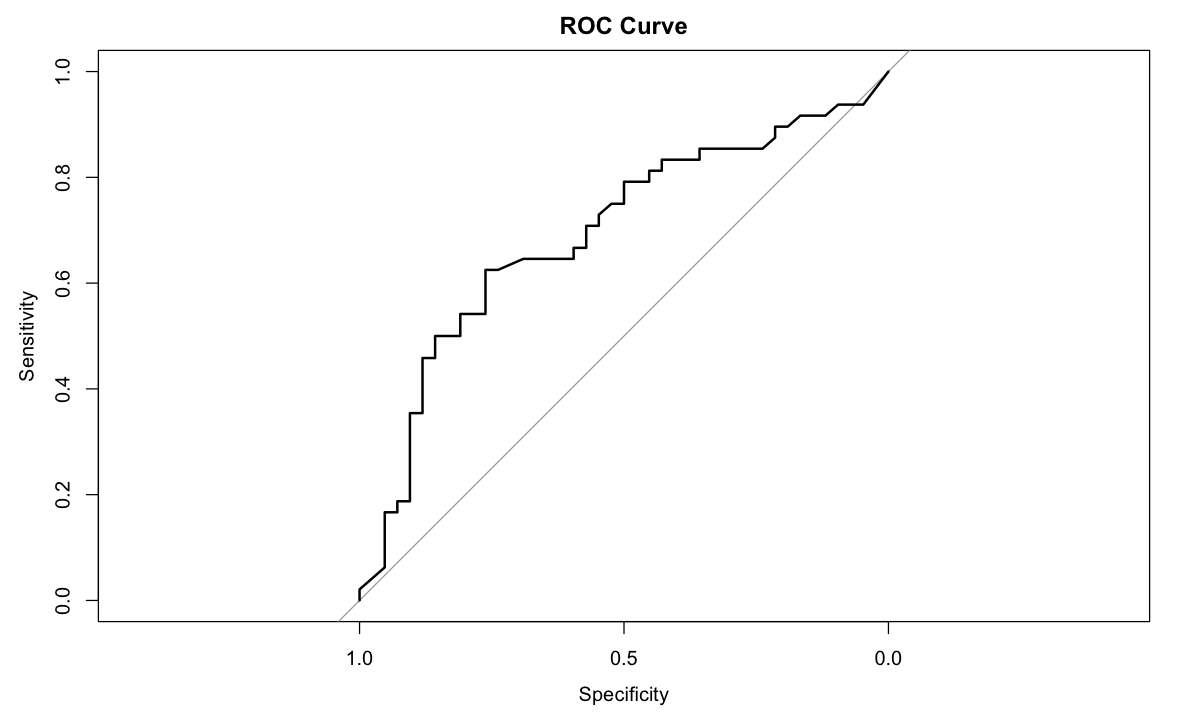

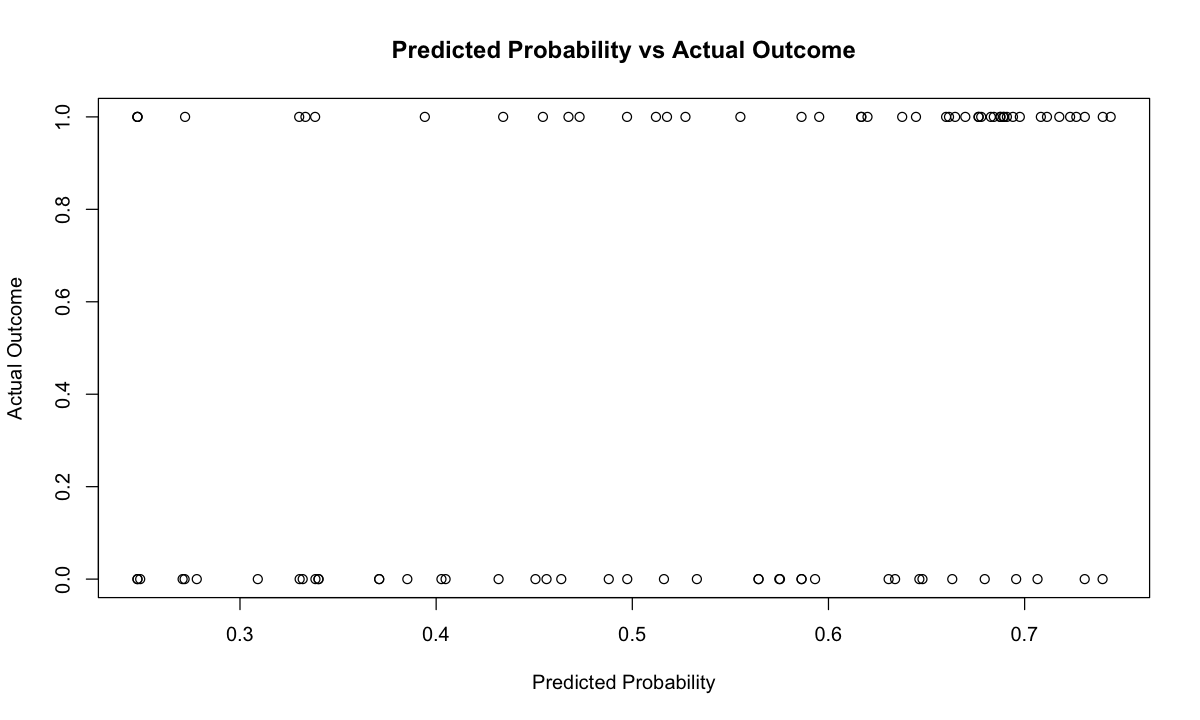

In [46]:
# Fit the logistic regression model
fit_logistic <- glm(serviceable_aadya ~ a_mos, data = subjective, family = binomial)

# Get predictions
predictions <- predict(fit_logistic, subjective, type = "response")

# Plot the ROC curve
par(bg = "white")
roc_curve <- roc(subjective$serviceable_aadya, predictions)
plot(roc_curve, main = "ROC Curve")
auc_value <- auc(roc_curve)
print(auc_value)

# Print confusion matrix
predicted_class <- ifelse(predictions > 0.5, 1, 0)
confusionMatrix(as.factor(predicted_class), as.factor(subjective$serviceable_aadya))

# Plot with jitter to visualize overlapping points
par(bg = "white")
plot(jitter(predictions), subjective$serviceable_aadya, 
     xlab = "Predicted Probability", ylab = "Actual Outcome", 
     main = "Predicted Probability vs Actual Outcome")